In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Task 1**

**Exploratory Data Analysis and Visualization**

In [ ]:
path ="/content/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
category_totals = df.groupby('customer_type')['total'].sum().reset_index()
print(category_totals)


  customer_type     total
0         basic  29569.16
1          gold  29939.99
2    non-member  31755.24
3       premium  31655.68
4      standard  31388.78




1.   Grouping the total sales by customer type gives us an idea about the category of customers that spend more.
2.   Accordingly we can work on marketing strategy to target customers that are spending lesser.
3. From this data we can see non-members are spending the most, they can be encouraged for membership.

In [ ]:
payment_total = df.groupby('payment_type')['total'].sum().reset_index()
print(payment_total )

  payment_type     total
0         cash  41287.31
1  credit card  39309.52
2   debit card  37010.67
3     e-wallet  36701.35




1.   Grouping the total sales by payment type gives us an idea about the payment method most frequently used.
2.   Other payment methods can be optimized for more scalable use.



<BarContainer object of 4 artists>

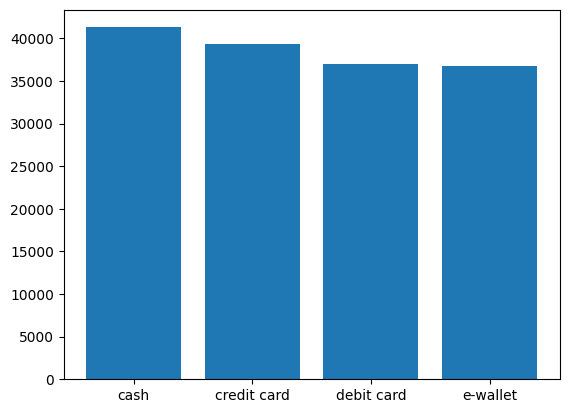

In [ ]:
plt.bar(payment_total["payment_type"],payment_total["total"])

<BarContainer object of 5 artists>

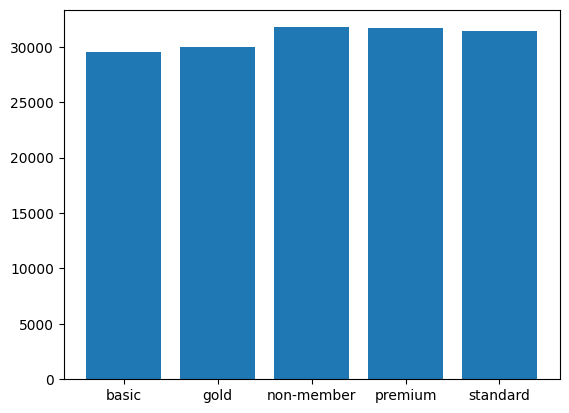

In [ ]:
plt.bar(category_totals["customer_type"],category_totals["total"])

In [ ]:
df.shape

(7829, 9)

In [ ]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [ ]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int=5):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=aspect).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=4).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  hm = sns.heatmap(data = corr)
  plt.show()
  corr.style.background_gradient(cmap='coolwarm')

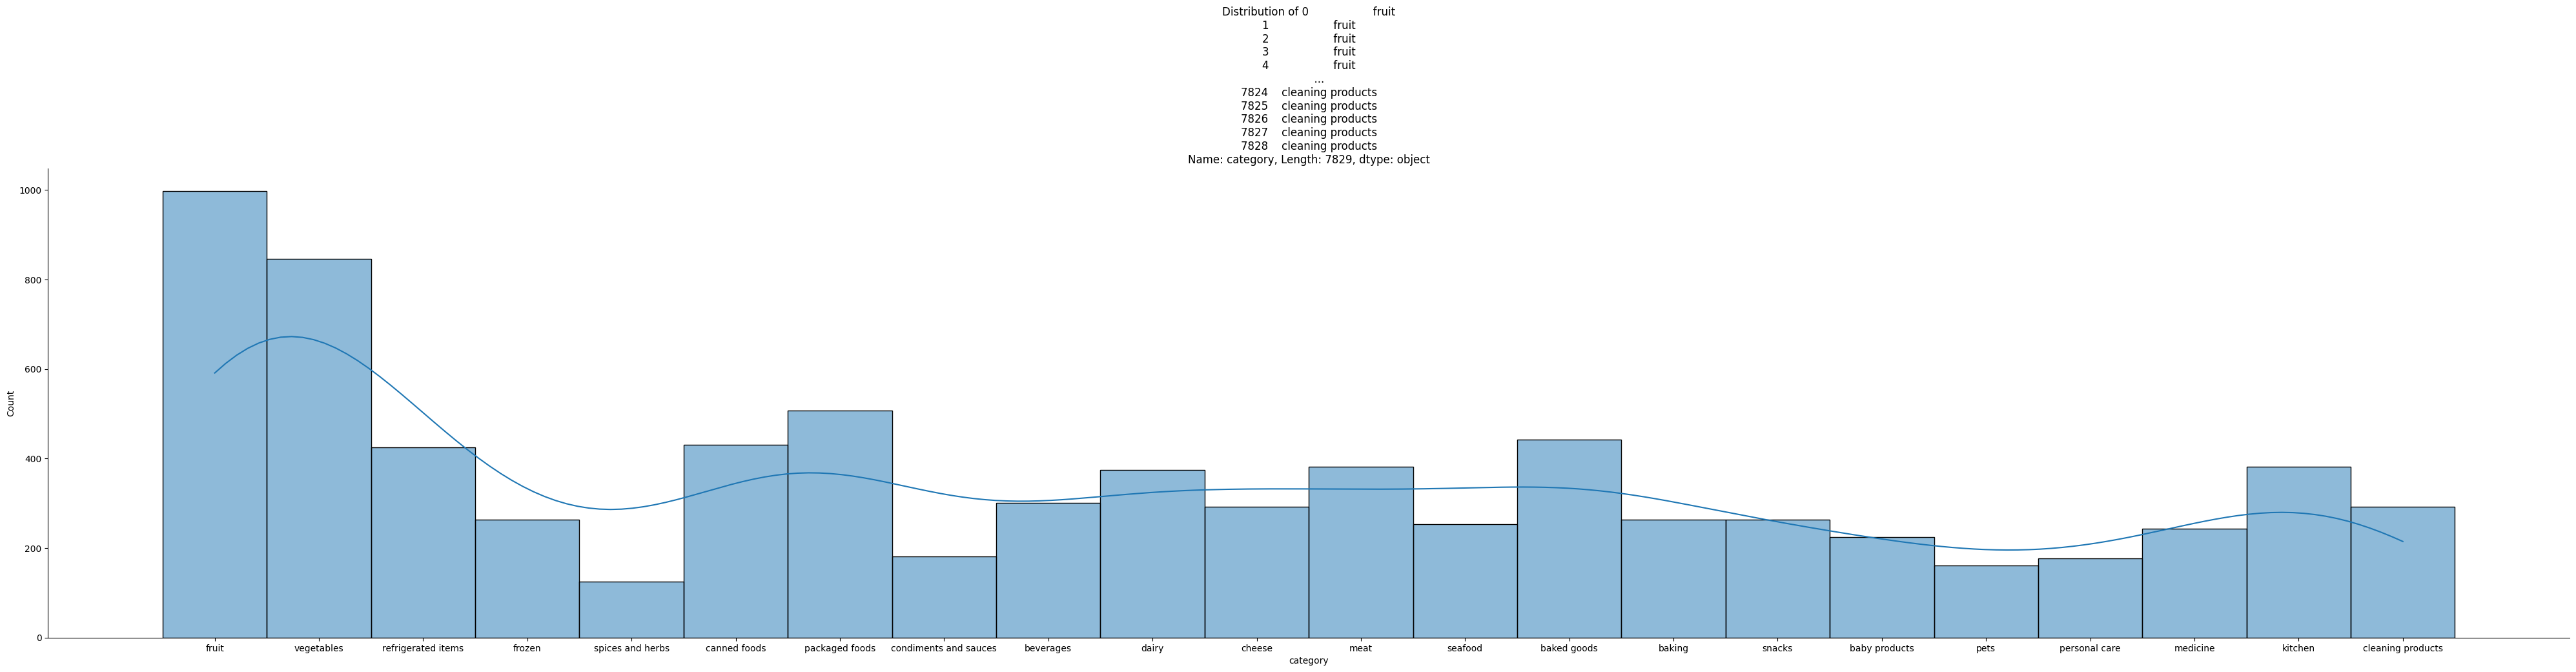

In [ ]:
plot_continuous_distribution(df,df["category"])

Above plot shows that fruits and vegetables are most bought products

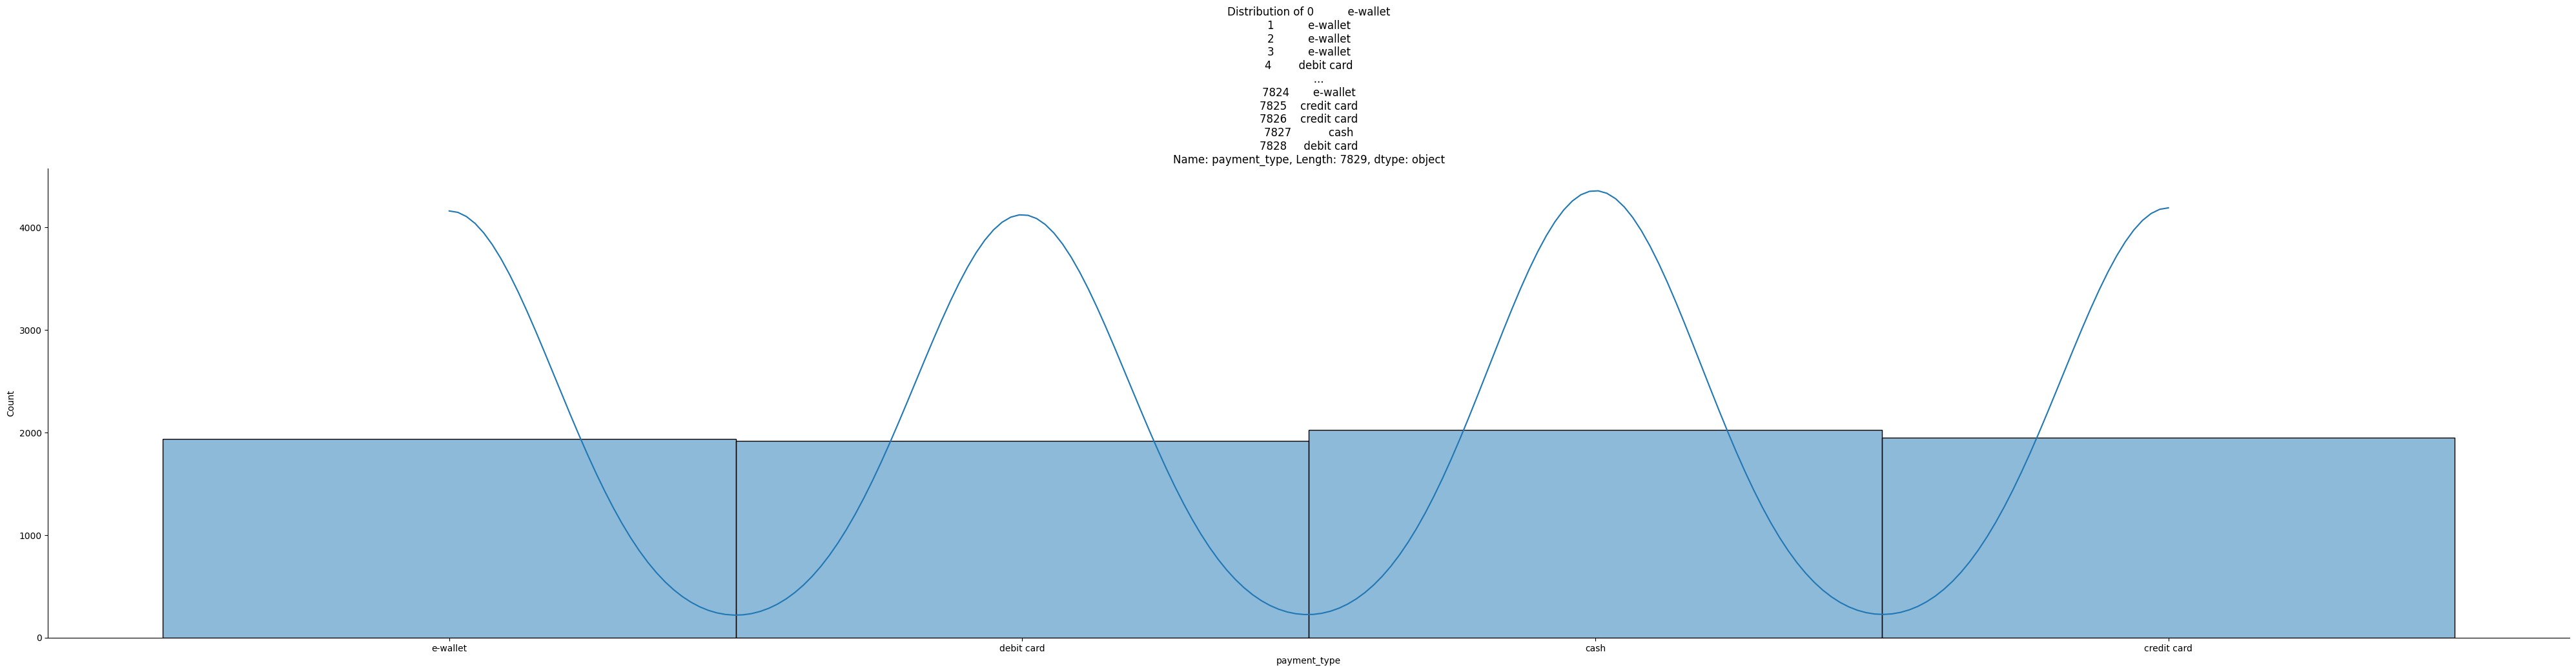

In [ ]:
plot_continuous_distribution(df,df["payment_type"])

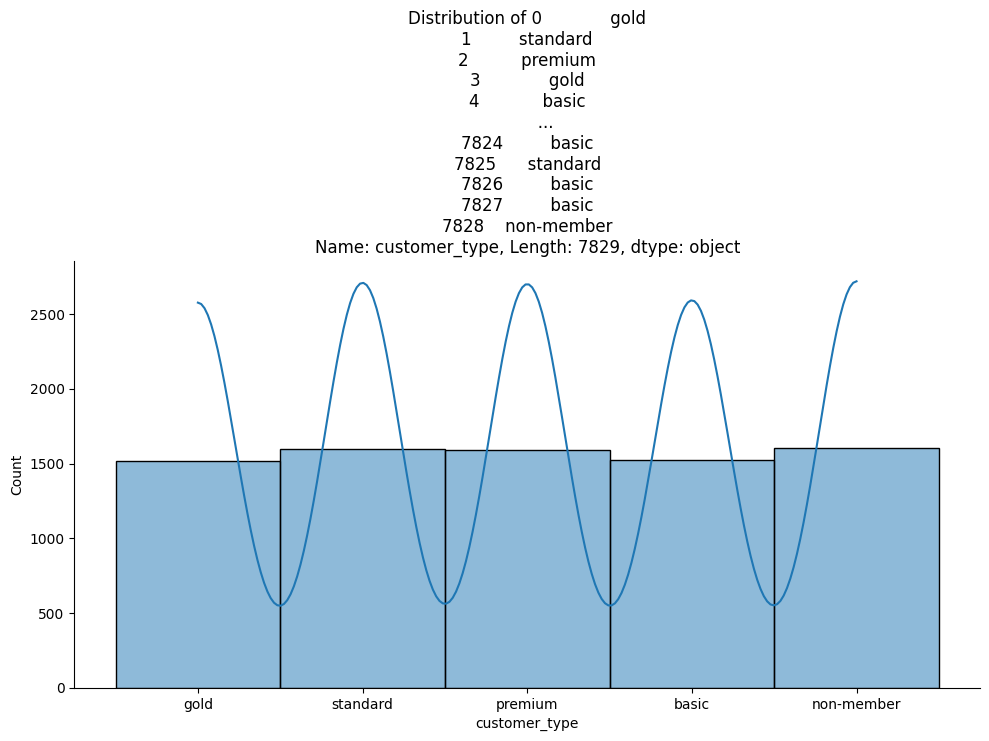

In [ ]:
plot_continuous_distribution(df,df["customer_type"],5,2)

<ipython-input-45-4ebe6f7f4320>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


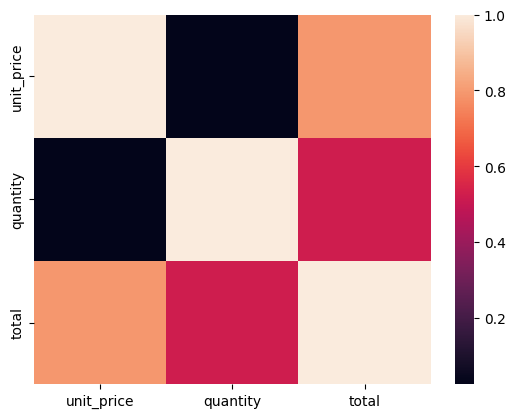

In [ ]:
correlation_plot(df)

# **Task3**

**Data Loading**

In [3]:
sales_df = pd.read_csv('/content/sales.csv')
sensor_stock = pd.read_csv('/content/sensor_stock_levels.csv')
sensor_temp = pd.read_csv('/content/sensor_storage_temperature.csv')

sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sensor_stock.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sensor_temp.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

**Data Cleaning**

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
sensor_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
sensor_stock.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
sensor_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


In [ ]:
sensor_temp.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Converting all timestamps to a common format

In [4]:
from datetime import datetime
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [5]:
sales_df = convert_to_datetime(sales_df,'timestamp')
sensor_stock =convert_to_datetime(sensor_stock,'timestamp')
sensor_temp = convert_to_datetime(sensor_temp,'timestamp')


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


**Data Merging**

Merging using timestamp because the model is required to predict on an hourly basis as required by the client

In [6]:
from datetime import datetime
def hourly_conversion(data, column):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [7]:
sales_df = hourly_conversion(sales_df,'timestamp')

In [ ]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [8]:
sensor_stock = hourly_conversion(sensor_stock,'timestamp')

In [ ]:
sensor_stock.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [9]:
sensor_temp = hourly_conversion(sensor_temp,'timestamp')

In [ ]:
sensor_temp.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Aggregate rows with same combination of (product_id , timestamp)

In [10]:
sales_agg = sales_df.groupby(['timestamp' , 'product_id']).agg({'quantity':'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [11]:
stock_agg = sensor_stock.groupby(['timestamp' , 'product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [12]:
temp_agg = sensor_temp.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


merging using stock_agg as base table

In [13]:
temp1 = stock_agg.merge(sales_agg, on=['timestamp','product_id'], how='left')
temp1.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [14]:
merged_stock = temp1.merge(temp_agg, on=['timestamp'], how='left')
merged_stock.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [15]:
merged_stock.isnull().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
temperature               0
dtype: int64

In [16]:
merged_stock['quantity'] = merged_stock['quantity'].fillna(0)
merged_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [17]:
category = sales_df[['product_id','category']].drop_duplicates()
price = sales_df[['product_id','unit_price']].drop_duplicates()

In [ ]:
category.shape

(300, 2)

In [ ]:
price.shape

(300, 2)

In [18]:
merged_stock = merged_stock.merge(category, on=['product_id'], how='left')
merged_stock = merged_stock.merge(price, on=['product_id'], how='left')

merged_stock.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [ ]:
merged_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


**Feature Engineering**

In [19]:
merged_stock['day_of_month'] = merged_stock['timestamp'].dt.day
merged_stock['day_of_week'] = merged_stock['timestamp'].dt.dayofweek
merged_stock['hour'] = merged_stock['timestamp'].dt.hour
merged_stock.drop(columns = ['timestamp'],inplace=True)
merged_stock.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_month,day_of_week,hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [20]:
from sklearn.preprocessing import LabelEncoder
df_temp = merged_stock.copy()
label_encoder = LabelEncoder()
df_temp['category_num'] = label_encoder.fit_transform(df_temp['category'])
df_temp.drop(columns=['category'], inplace=True)


In [127]:
df_temp.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category_num
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,11
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,21
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,3
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,16


In [129]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           10845 non-null  object 
 1   estimated_stock_pct  10845 non-null  float64
 2   quantity             10845 non-null  float64
 3   temperature          10845 non-null  float64
 4   unit_price           10845 non-null  float64
 5   day_of_month         10845 non-null  int64  
 6   day_of_week          10845 non-null  int64  
 7   hour                 10845 non-null  int64  
 8   category_num         10845 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 847.3+ KB


In [21]:

merged_stock = pd.get_dummies(merged_stock, columns=['category'])
merged_stock.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [151]:
merged_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   day_of_month                    10845 non-null  int64  
 6   day_of_week                     10845 non-null  int64  
 7   hour                            10845 non-null  int64  
 8   category_baby products          10845 non-null  uint8  
 9   category_baked goods            10845 non-null  uint8  
 10  category_baking                 10845 non-null  uint8  
 11  category_beverages              10845 non-null  uint8  
 12  category_canned foods           

Since every row is a unique combination of product_id and timestamp, so each table is unique, hence we can drop *product_id*

In [22]:
merged_stock.drop(columns=['product_id'], inplace=True)
df_temp.drop(columns=['product_id'], inplace=True)

In [ ]:
merged_stock.head()

,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Modelling**

In [23]:
X = merged_stock.drop(columns=['estimated_stock_pct'])
Y = merged_stock['estimated_stock_pct']
print(X.shape)
print(Y.shape)

(10845, 28)
(10845,)


In [24]:
x_temp = df_temp.drop(columns = ['estimated_stock_pct'])
y_temp = df_temp['estimated_stock_pct']
print(x_temp.shape)
print(y_temp.shape)

(10845, 7)
(10845,)


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [80]:
def random_forest_model(X,Y):
  k=10
  accuracy = []
  for fold in range(0,k):
    model = RandomForestRegressor()
    scaler = StandardScaler()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=3)

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    result = model.fit(X_train,Y_train)
    y_predicted = result.predict(X_test)

    mse = mean_squared_error(Y_test, y_predicted)

    mae = mean_absolute_error(y_true = Y_test, y_pred = y_predicted)
    accuracy.append(mae)

    print('Fold ' , fold, ': ')
    print('MSE: ',mse)
    print('MAE: ', mae)

  print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")
  return result


mae = 0.235 at k=10

In [81]:
r1 =random_forest_model(X,Y)

Fold  0 : 
MSE:  0.08002196310438944
MAE:  0.2356137062330311
Fold  1 : 
MSE:  0.07973253228935334
MAE:  0.23534191706550456
Fold  2 : 
MSE:  0.07954551538286335
MAE:  0.23497302561527147
Fold  3 : 
MSE:  0.07962355106537544
MAE:  0.23523027974909802
Fold  4 : 
MSE:  0.07947291293396153
MAE:  0.23501973941524512
Fold  5 : 
MSE:  0.08000927295307361
MAE:  0.2356083745023674
Fold  6 : 
MSE:  0.07971888098230216
MAE:  0.23537207387922893
Fold  7 : 
MSE:  0.07998842713742939
MAE:  0.23595127873736707
Fold  8 : 
MSE:  0.07967085902514934
MAE:  0.2355638112161262
Fold  9 : 
MSE:  0.08010315875799091
MAE:  0.23617175621766306
Average MAE: 0.24


In [70]:
r2 = random_forest_model(x_temp,y_temp)

Fold  0 : 
MSE:  0.07982170703857437
MAE:  0.23551600386854446
Fold  1 : 
MSE:  0.07968092792674772
MAE:  0.23528302833441278
Fold  2 : 
MSE:  0.0799468545161708
MAE:  0.23548053294940616
Fold  3 : 
MSE:  0.07995344059334257
MAE:  0.23565677094996595
Fold  4 : 
MSE:  0.07992731934482437
MAE:  0.2356390345470446
Fold  5 : 
MSE:  0.07977346016104678
MAE:  0.23524949131704317
Fold  6 : 
MSE:  0.07962407912393756
MAE:  0.23529030891640504
Fold  7 : 
MSE:  0.08001397965279484
MAE:  0.23565211435075414
Fold  8 : 
MSE:  0.07963773598024423
MAE:  0.23508165161419567
Fold  9 : 
MSE:  0.08011993617347632
MAE:  0.23590668653766636
Fold  10 : 
MSE:  0.07985687097365378
MAE:  0.2355151429687443
Fold  11 : 
MSE:  0.08008453126719738
MAE:  0.23562453849151463
Fold  12 : 
MSE:  0.07986107102401835
MAE:  0.23558571298217304
Fold  13 : 
MSE:  0.07959758204970394
MAE:  0.2352275706107708
Fold  14 : 
MSE:  0.07962455529015339
MAE:  0.23507293414326697
Fold  15 : 
MSE:  0.07961204718762085
MAE:  0.23536440

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
def linear_regression_model(X,Y):
    scaler = StandardScaler()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=3)

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(Y_test, y_pred)
    print(mse)
    mae = mean_absolute_error(y_true = Y_test, y_pred = y_pred)
    print(mae)
    return model

In [53]:
Reg1 = linear_regression_model(X,Y)

0.07174190194346498
0.22497745554551468


In [54]:
Reg2 = linear_regression_model(x_temp,y_temp)

0.07079895499765046
0.22381507437698364


In [44]:
def important_features(model,X):
  features = [i for i in X.columns]
  importances = model.feature_importances_
  indices = np.argsort(importances)


  # printing top 5 features relevant to model
  for i in range(1,6):
    index = indices[-i]
    print(features[index])


Important features of Random forest model with 28 features

In [82]:
important_features(r1,X)

unit_price
temperature
hour
quantity
day_of_week


Important features of Random forest model with 7 features

In [49]:
important_features(r2,x_temp)

unit_price
category_num
temperature
hour
quantity


Important features of Regression model with 28 features

In [62]:
coefficients = Reg1.coef_
print(coefficients)

[ 9.76747150e-03 -6.27297309e-03 -1.58532477e-02  8.53130475e-03
 -1.32892977e-02  1.06369371e-02 -4.45117100e+11 -4.91839507e+11
 -4.38840523e+11 -4.86305661e+11 -4.23756250e+11 -4.25950471e+11
 -4.51287652e+11 -4.90003753e+11 -3.96294612e+11 -4.32453306e+11
 -4.55344582e+11 -3.74141489e+11 -4.51287652e+11 -4.30298798e+11
 -4.08001984e+11 -3.93904229e+11 -3.98668306e+11 -4.47185513e+11
 -4.45117100e+11 -4.43036909e+11 -4.47185513e+11 -4.32453306e+11]


In [63]:
features = [i for i in X.columns]
indices = np.argsort(coefficients)


# printing top 5 features relevant to model
for i in range(1,6):
    index = indices[-i]
    print(features[index])

hour
quantity
day_of_month
temperature
day_of_week


Important features of Regression model with 7 features

In [78]:
coefficients_2 = Reg2.coef_
print(coefficients_2)

[ 0.00941681 -0.00761557 -0.00849984  0.0080546  -0.01305554  0.01105236
  0.00051554]


In [79]:
features = [i for i in x_temp.columns]
indices = np.argsort(coefficients)


# printing top 5 features relevant to model
for i in range(1,6):
    index = indices[-i]
    print(features[index])

hour
quantity
day_of_month
temperature
day_of_week
